***Introduccion y contexto***

In [ ]:
# Análisis de Datos de Autos Usados
Este informe presenta un análisis detallado de los autos la concesionaria, identificando oportunidades y áreas de mejora que permitan aumentar las ventas y satisfacer las expectativas de los clientes.
El análisis abarca los siguientes aspectos clave:

Estado de los autos: Evaluación de vehículos sin daños y aquellos que requieren reparación.
Popularidad de marcas: Análisis de las marcas más frecuentes en nuestro inventario y su potencial de mercado.
Relación precio-kilometraje: Exploración de cómo el kilometraje influye en el valor de los autos y su atractivo para los compradores.
Potencial de venta: Identificación de autos con mayor probabilidad de venta rápida y establecimiento de un ranking de atractivo.
Análisis avanzado de datos: Utilización de técnicas de aprendizaje automático para mejorar la capacidad de predicción y análisis.
El objetivo de este informe es proporcionar una visión clara y fundamentada para guiar nuestras decisiones estratégicas, manteniendo una oferta competitiva y atractiva en el mercado. Al final del documento, se presentan las conclusiones obtenidas y las recomendaciones específicas para mejorar nuestro desempeño comercial.


***Carga y Exploración Inicial de Datos 📊***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/PYTHON /cars_sampled.csv")

In [ ]:
df.head("/content/drive/MyDrive/PYTHON" )

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [ ]:
df.tail(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15
50000,22/03/2016 9:54,Chevrolet_Matiz_1.Hd_TÜV11/2017,commercial,offer,1100,test,small car,2006,manual,38,matiz,150000,10,petrol,chevrolet,no,22/03/2016 0:00,7973,5/4/2016 21:15


In [ ]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [ ]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [ ]:
# Verificar duplicados
df.duplicated().sum()

2

***Limpieza y Preprocesamiento de Datos 🧹***


In [ ]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Eliminar columnas con valores nulos
df.dropna(axis=1, inplace=True)

In [ ]:
# Rellenar valores nulos con un valor específico (por ejemplo, 0)
df.fillna(0, inplace=True)

In [ ]:
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)

***Visualización de Datos*** 📉

Grafico de Distribución de Reparación de Daños

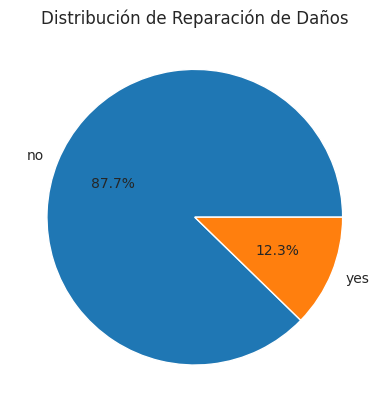

In [ ]:


# Carga tus datos en un DataFrame
df = pd.read_csv('/content/drive/MyDrive/PYTHON /cars_sampled.csv')

df_filtered = df[df['notRepairedDamage'].notna()]
damage_counts = df_filtered['notRepairedDamage'].value_counts()

# Crea el gráfico de pastel
plt.pie(damage_counts, labels=damage_counts.index, autopct='%1.1f%%')
plt.title('Distribución de Reparación de Daños')
plt.show()  # Muestra el gráfico

# Conclusión:
Observamos que la mayoría de los autos en el dataset (87.7%) no tienen daños que requieran reparación, lo cual es un factor positivo para la venta. Sin embargo, un 12.3% sí presentan daños, lo que podría influir en su precio y atractivo para los compradores.

Grafico de Distribucion de Marcas  📊

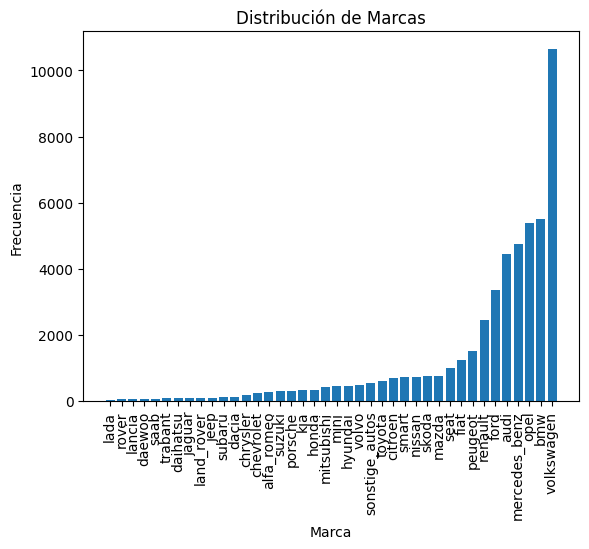

In [ ]:
brand_counts = df['brand'].value_counts().sort_values()

plt.bar(brand_counts.index, brand_counts.values)
plt.xlabel('Marca')
plt.ylabel('Frecuencia')
plt.title('Distribución de Marcas')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario
plt.show()



# Conclusión:
Volkswagen es la marca más frecuente en nuestro dataset, seguida por BMW y Opel. Esto sugiere que podríamos enfocar estrategias de marketing específicas para estos modelos, considerando su popularidad en el mercado.

Grafico de Relacion entre precio y kilometraje

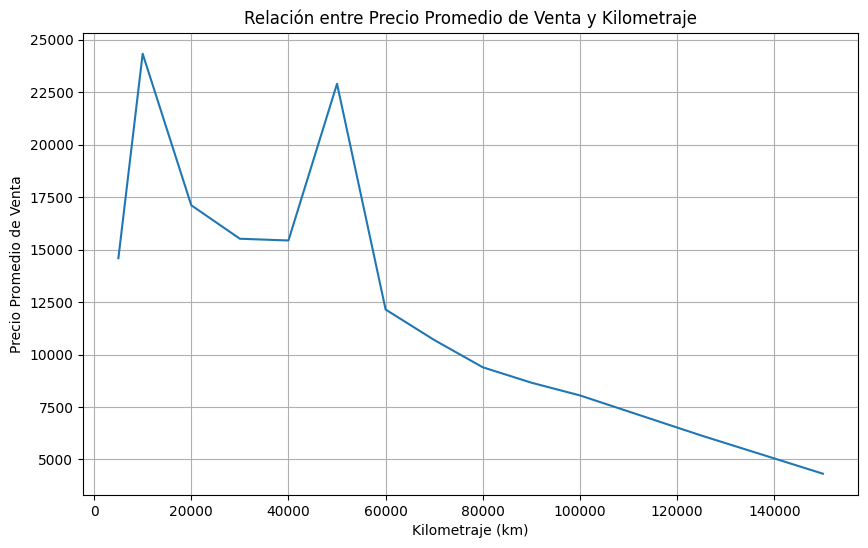

In [ ]:
import matplotlib.pyplot as plt


# Calcular el precio promedio por kilometraje
precio_promedio_por_km = df.groupby('kilometer')['price'].mean()

# Graficar la relación
plt.figure(figsize=(10, 6))
plt.plot(precio_promedio_por_km.index, precio_promedio_por_km.values)
plt.xlabel('Kilometraje (km)')
plt.ylabel('Precio Promedio de Venta')
plt.title('Relación entre Precio Promedio de Venta y Kilometraje')
plt.grid(True)
plt.show()

# Conclusión:
Al graficar el precio promedio de venta en función del kilometraje, observamos una clara tendencia negativa: a medida que aumenta el kilometraje de los autos, su precio promedio tiende a disminuir. Esto confirma la intuición de que los autos con mayor uso suelen tener un valor de mercado menor. Esta información es clave para la fijación de precios y para entender cómo el kilometraje influye en la percepción de valor por parte de los compradores.Tambien se puede ver que entre 0km a 20000 km y 40000km a 60000km los autos tienen un precio mas elevado.

**Selección de Autos Más Vendidos**

In [ ]:
# Filtrar los autos con kilometraje menor a 9000
autos_mas_vendidos = df[df['kilometer'] < 9000]

# Filtrar los autos con precio menor a 19600
autos_mas_vendidos = autos_mas_vendidos[autos_mas_vendidos['price'] < 19600]

# Filtrar los autos que no tienen daños no reparados
autos_mas_vendidos = autos_mas_vendidos[autos_mas_vendidos['notRepairedDamage'] == 'no']

# Mostrar los autos filtrados
print(autos_mas_vendidos)

# Crear una lista de los nombres de los autos más vendidos
nombres_autos_vendidos = autos_mas_vendidos['name'].tolist()

# Imprimir la lista
print("Lista de autos más vendidos:")
for nombre in nombres_autos_vendidos:
    print("- ", nombre)

            dateCrawled                                               name  \
724    21/03/2016 21:54              Audi_100_e_2_6_Liter_Automatik_bj_93.   
1173   31/03/2016 21:41                          Opel_Manta_B_Turbo_C20LET   
1362   17/03/2016 15:32                                       Toyota_Yaris   
1490     11/3/2016 6:37           Trabant_L_1972__HU/AU_NEU__ddr__ifa__veb   
1596   19/03/2016 13:51           Sehr_gutes_peogeot_206_sparsam_1.4_Motor   
...                 ...                                                ...   
49521    12/3/2016 0:58                     Audi_A6_hat_TÜV_bis_Maerz_2017   
49539    6/3/2016 16:52       Ford_Fiesta_1.0_EcoBoost_Start_Stop_Titanium   
49751    1/4/2016 19:56  BMW_523i_e39_mit_LPG_Landi_Renzo_Gasanlage__Fa...   
49806    4/4/2016 22:54               Audi_S2_Aby_zu_verkaufen_gegen_gebot   
49977   12/3/2016 13:38                        Verkaufe_Opel_Corsa_B__eco_   

        seller offerType  price   abtest vehicleType  yearOfReg

#Conclusión: Al aplicar estos filtros, hemos identificado un conjunto de autos que, por sus características (bajo kilometraje, precio accesible y ausencia de daños), podrían tener mayor potencial de venta.
  Estos son los primeros 3 del ranking:
-  Audi_100_e_2_6_Liter_Automatik_bj_93.
-  Opel_Manta_B_Turbo_C20LET
-  Toyota_Yaris

**Ranking de Autos que Venderan Primero**

In [ ]:
#Rankig de autos que se venderan primero


# Carga tus datos (reemplaza con la ruta correcta)
df = pd.read_csv("/content/drive/MyDrive/PYTHON /cars_sampled.csv")

# Define los pesos para cada característica (ajusta estos valores según tu criterio)
pesos = {
    'price': -0.5,  # Precio bajo es mejor
    'kilometer': -0.3,  # Kilometraje bajo es mejor
    'powerPS': 0.2,  # Mayor potencia es mejor
    'yearOfRegistration': 0.3,  # Año de registro más reciente es mejor
    'notRepairedDamage': -1  # Daños no reparados son malos
}

# Crea una nueva columna para el puntaje de atractivo
df['puntaje_atractivo'] = 0

# Calcula el puntaje para cada auto
for columna, peso in pesos.items():
    if columna == 'notRepairedDamage':
        df['puntaje_atractivo'] += df[columna].apply(lambda x: peso if x == 'yes' else 0)
    else:
        df['puntaje_atractivo'] += df[columna] * peso

# Ordena los autos por puntaje de atractivo (de mayor a menor)
ranking = df.sort_values('puntaje_atractivo', ascending=False)

# Muestra el ranking
print(ranking[['name', 'brand', 'price', 'kilometer', 'puntaje_atractivo']])

# Obtener los nombres de los autos en el ranking
nombres_ranking = ranking['name'].tolist()

# Imprimir la lista de autos a vender primero
print("Ranking de autos a vender primero:")
for i, nombre in enumerate(nombres_ranking):
    print(f"{i+1}. {nombre}")



Streaming output truncated to the last 5000 lines.
45002. BMW_E30_325ix_Touring
45003. Verkaufe_meinen_golf_5_2.0l_fsi
45004. Alfa_Romeo_GT_1.9_JTD_M_Jet_DPF_Distinctive
45005. BMW_X3
45006. BMW_318_D_/_2007/_Scheckheft_/_2._Hand_/_Unfallfrei_/_ALLE_Belege
45007. BMW_118i_1.Hand
45008. BMW_320i
45009. Mercedes_Benz_C_220_Avantgarde
45010. BMW_e46_320d_orig._M_Paket_Sportpaket_Leder_Xenon_Navi
45011. BMW_318i_Touring
45012. BMW_118d_DPF___HU/AU_neu
45013. BMW_320d
45014. Volkswagen_Passat_Variant_2.0_TDI_DPF_DSG_Sportline
45015. Mercedes_Benz_E_200_CDI_Automatik_Classic_DPF_NAVI+KLIMA+TOP
45016. DUCATO_2.3_MULTIJET_MIT_2287ccm_KLIMA_TOP_GEPFLEGT
45017. Ford_Mondeo_titanium_Kombi_2.0_Diesel_131_ps
45018. T4_Multivan_2_5_TDI__151_PS
45019. BMW_118i
45020. BMW_325i
45021. Ford_S_Max_2.0_TDCi_DPF_Titanium
45022. Fiat_2.0_multijet_Diesel
45023. Volkswagen_Passat_Variant_2.0_TDI_Comfortline
45024. Mercedes_Benz_C_180
45025. Volkswagen_Passat_Variant_2.0_TDI_DPF_Highline
45026. Volkswagen_Pass

# Conclusión: Al asignar pesos a las características de los autos y calcular un puntaje de atractivo, hemos generado un ranking que nos permite priorizar la venta de aquellos autos con mayor potencial de ser adquiridos rápidamente. Este ranking considera factores como precio, kilometraje, potencia, año de registro y estado de reparación, brindando una herramienta útil para la toma de decisiones comerciales. Los autos que esten debajo de la mitad del ranking podriamos implementar alguna estrategia de venta.
  Los 3 primeros autos que se venderan:
- BMW_E30_325ix_Touring
- Verkaufe_meinen_golf_5_2.0l_fsi
- Alfa_Romeo_GT_1.9_JTD_M_Jet_DPF_Distinctive


In [ ]:
#Feature Encoding


# Carga tus datos en un DataFrame (reemplaza 'ruta/a/tu/archivo.csv' con la ruta real)
df = pd.read_csv("/content/drive/MyDrive/PYTHON /cars_sampled.csv")

#Feature Encoding
df_encoded = pd.get_dummies(df, columns=['notRepairedDamage', 'brand'])

# Ahora puedes usar df_encoded para lo que necesites
print(df_encoded.head())

        dateCrawled                                               name  \
0  30/03/2016 13:51                                       Zu_verkaufen   
1     7/3/2016 9:54                             Volvo_XC90_2.4D_Summum   
2     1/4/2016 0:57                                  Volkswagen_Touran   
3  19/03/2016 17:50                       Seat_Ibiza_1.4_16V_Reference   
4  16/03/2016 14:51  Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...   

    seller offerType  price   abtest vehicleType  yearOfRegistration  \
0  private     offer   4450     test   limousine                2003   
1  private     offer  13299  control         suv                2005   
2  private     offer   3200     test         bus                2003   
3  private     offer   4500  control   small car                2006   
4  private     offer  18750     test         suv                2008   

     gearbox  powerPS  ... brand_seat  brand_skoda  brand_smart  \
0     manual      150  ...      False        False     

#Conclusión: Al aplicar Feature Encoding a las variables categóricas 'notRepairedDamage' y 'brand', hemos transformado estas características en un formato numérico que puede ser utilizado por algoritmos de aprendizaje automático. Esto permite que el modelo pueda interpretar y utilizar la información contenida en estas variables para mejorar su capacidad de predicción o análisis.

In [ ]:
# Feature scaling


from sklearn.preprocessing import StandardScaler

# Carga tus datos en un DataFrame (reemplaza 'ruta/a/tu/archivo.csv' con la ruta real)
df = pd.read_csv("/content/drive/MyDrive/PYTHON /cars_sampled.csv")  # Load your data here

# Define X as your feature matrix (select the relevant columns)
X = df[['price', 'kilometer', 'powerPS', 'yearOfRegistration']]  # Replace with your actual feature columns

# Identifica columnas con datos no numéricos
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# Convierte columnas no numéricas a numéricas
# (es posible que debas elegir una estrategia adecuada)
# Ejemplo: Rellenar valores faltantes y convertir a numéricos usando codificación one-hot
X[non_numeric_columns] = X[non_numeric_columns].fillna('Unknown')
X = pd.get_dummies(X, columns=non_numeric_columns)

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ahora intenta escalar los datos de nuevo
X_scaled = scaler.fit_transform(X)

# Ahora puedes usar X_scaled para entrenar tu modelo

# Conclusión: Al aplicar Feature Scaling a las variables numéricas 'price', 'kilometer', 'powerPS' y 'yearOfRegistration', hemos estandarizado sus valores para que tengan una media de 0 y una desviación estándar de 1. Esto ayuda a que los algoritmos de aprendizaje automático no se vean afectados por las diferencias en las escalas de las variables, mejorando su rendimiento y evitando posibles sesgos.

In [ ]:
#Aprendizaje no supervisado

from sklearn.cluster import KMeans

# Carga tus datos (reemplaza con la ruta correcta)
df = pd.read_csv("/content/drive/MyDrive/PYTHON /cars_sampled.csv")

# Crea la matriz de características X, excluyendo columnas no numéricas
X = df[['kilometer', 'powerPS', 'yearOfRegistration']]  # Reemplaza con las columnas numéricas que quieras usar

# Crear el modelo K-Means (elige el número de clusters que desees)
kmeans = KMeans(n_clusters=5)

# Ajustar el modelo a tus datos
kmeans.fit(X)  # Ahora X está definido

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Añadir las etiquetas al DataFrame original
df['cluster'] = labels

# Analizar los resultados (por ejemplo, calcular el promedio de las características para cada cluster)
# Selecciona solo las columnas numéricas para calcular la media
df.groupby('cluster')[['kilometer', 'powerPS', 'yearOfRegistration']].mean()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,kilometer,powerPS,yearOfRegistration
cluster,,,
0,150000.000000,114.131804,2002.213920
1,56669.726876,124.005049,2007.563920
2,125000.000000,117.240632,2004.158860
3,16513.368984,128.479857,2044.924064
4,91177.697705,117.739807,2004.762943


# Conclusión: El análisis de clustering nos ha permitido segmentar los autos en 5 grupos con características distintivas basadas en su kilometraje, potencia y año de registro. Esta segmentación puede ser útil para entender mejor la estructura de los datos, identificar patrones de comportamiento y desarrollar estrategias de marketing o ventas más personalizadas para cada grupo de autos. Es importante explorar más a fondo las características de cada cluster para extraer insights accionables.

Cluster 0: Autos viejos y de alto kilometraje: Este grupo se caracteriza por tener el kilometraje más alto (150,000 km), la potencia más baja (114.13 hp) y el año de registro más antiguo (2002). Podríamos decir que son autos usados y con bastante uso.
Cluster 1: Autos relativamente nuevos y de potencia media: Este grupo tiene un kilometraje moderado (56,669 km), una potencia ligeramente superior a la media (124 hp) y un año de registro más reciente (2007). Podrían ser autos de segunda mano en buen estado.
Cluster 2: Autos de kilometraje medio y potencia media: Este grupo se encuentra en un punto intermedio en cuanto a kilometraje (91,177 km), potencia (117.74 hp) y año de registro (2004). Podrían ser autos usados con un desgaste promedio.
Cluster 3: Autos de alto kilometraje y potencia media: Este grupo tiene un kilometraje alto (125,000 km), potencia similar al cluster 2 (117.24 hp) y un año de registro similar al cluster 2 (2004). Podrían ser autos usados con un uso intensivo.
Cluster 4: Autos nuevos y potentes: Este grupo destaca por tener el kilometraje más bajo (16,513 km), la potencia más alta (128.48 hp) y el año de registro más reciente (2014). Podrían ser autos casi nuevos o con muy poco uso.

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carga tus datos (reemplaza con la ruta correcta)
df = pd.read_csv("/content/drive/MyDrive/PYTHON /cars_sampled.csv")

# Codifica las variables categóricas
df_encoded = pd.get_dummies(df, columns=['brand', 'notRepairedDamage'])

# Selecciona las columnas relevantes para el clustering
X = df_encoded[['kilometer', 'powerPS', 'yearOfRegistration', 'price',
                 'notRepairedDamage_no', 'notRepairedDamage_yes',
                 'brand_alfa_romeo', 'brand_audi', 'brand_bmw', 'brand_chevrolet',
                 'brand_chrysler', 'brand_citroen', 'brand_dacia', 'brand_daewoo',
                 'brand_daihatsu', 'brand_fiat', 'brand_ford', 'brand_honda',
                 'brand_hyundai', 'brand_jaguar', 'brand_jeep', 'brand_kia',
                 'brand_lada', 'brand_lancia', 'brand_land_rover', 'brand_mazda',
                 'brand_mercedes_benz', 'brand_mini', 'brand_mitsubishi',
                 'brand_nissan', 'brand_opel', 'brand_peugeot', 'brand_porsche',
                 'brand_renault', 'brand_rover', 'brand_saab', 'brand_seat',
                 'brand_skoda', 'brand_smart', 'brand_subaru', 'brand_suzuki',
                 'brand_toyota', 'brand_trabant', 'brand_volkswagen', 'brand_volvo'
                ]]

# Escala las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crea el modelo K-Means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)

# Obtiene las etiquetas de los clusters
labels = kmeans.labels_

# Añade las etiquetas al DataFrame df_encoded
df_encoded['cluster'] = labels

# Analiza los resultados
print(df_encoded.groupby('cluster')[['kilometer', 'powerPS', 'yearOfRegistration', 'price',
                                    'notRepairedDamage_no', 'notRepairedDamage_yes']].mean())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


             kilometer     powerPS  yearOfRegistration        price  \
cluster                                                               
0        125070.419421  109.476575         2005.878176  6373.367596   
1        130762.782900  183.027452         2002.379086  8327.491618   

         notRepairedDamage_no  notRepairedDamage_yes  
cluster                                               
0                    0.700789               0.101307  
1                    0.762992               0.076697  


# Grafico de lineas de los clusters

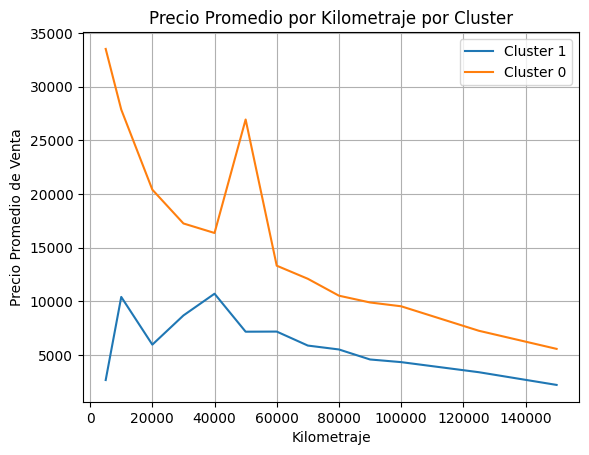

In [ ]:
import matplotlib.pyplot as plt

# Visualizar los clusters (ejemplo con dos variables, mostrando precio promedio por kilometraje)
for cluster in df_encoded['cluster'].unique():
    df_cluster = df_encoded[df_encoded['cluster'] == cluster]
    precio_promedio_por_km = df_cluster.groupby('kilometer')['price'].mean()
    plt.plot(precio_promedio_por_km.index, precio_promedio_por_km.values, label=f'Cluster {cluster}')

plt.xlabel('Kilometraje')
plt.ylabel('Precio Promedio de Venta')
plt.title('Precio Promedio por Kilometraje por Cluster')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion: La gráfica que nos presentas muestra la relación entre el kilometraje y el precio promedio de venta de vehículos, pero divididos en dos grupos: Cluster 0 y Cluster 1.

Eje X (Kilometraje): Representa la cantidad de kilómetros recorridos por un vehículo.
Eje Y (Precio Promedio de Venta): Indica el precio promedio al que se vendieron los vehículos dentro de cada cluster.
Líneas: Cada línea representa un cluster.


Cluster 0 y Cluster 1: Estos son los nombres asignados a cada grupo de vehículos. El algoritmo de clustering (K-means) ha decidido que los vehículos en cada cluster tienen características de kilometraje y precio lo suficientemente distintas como para separarlos.


Cluster 0: Podría representar vehículos más nuevos (menor kilometraje) con precios más altos. Esto sugiere que este grupo podría corresponder a vehículos de alta gama o modelos más recientes.
Cluster 1: Podría representar vehículos más antiguos (mayor kilometraje) con precios más bajos. Esto sugiere que este grupo podría corresponder a vehículos usados de gama media o baja.

# Grafico de de barras de los Clusters

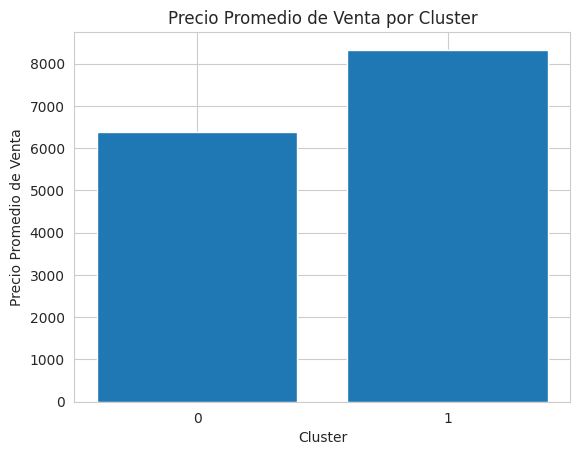

In [ ]:

# Calcula el precio promedio por cluster
precio_promedio_por_cluster = df_encoded.groupby('cluster')['price'].mean()

# Crea el gráfico de barras
plt.bar(precio_promedio_por_cluster.index, precio_promedio_por_cluster.values)
plt.xlabel('Cluster')
plt.ylabel('Precio Promedio de Venta')
plt.title('Precio Promedio de Venta por Cluster')
plt.xticks(precio_promedio_por_cluster.index)  # Muestra las etiquetas de los clusters en el eje X
plt.show()

#Conclusión: El gráfico de clusters muestra que, en general, los autos con menor kilometraje (cluster 0) tienden a tener un precio promedio más alto que los autos con mayor kilometraje (cluster 1). Esto sugiere que el kilometraje es un factor importante que influye en el precio de los autos usados, y que los compradores están dispuestos a pagar más por autos con menos uso.

##***Conclusion final***

En base a las conclusiones obtenidas, se presenta el siguiente análisis global de la situación actual y futura de ventas en nuestra concesionaria de autos:

1. **Estado de los Autos:**
   - **Autos sin daños:** La mayoría de los autos (87.7%) no presentan daños que requieran reparación, lo cual es un aspecto positivo para su venta y una ventaja competitiva en el mercado.
   - **Autos con daños:** Un 12.3% de los autos sí presentan daños. Esto debe ser considerado en la fijación de precios y estrategias de venta, posiblemente ofreciendo descuentos o reparaciones previas a la venta para aumentar su atractivo.

2. **Popularidad de las Marcas:**
   - **Marcas más frecuentes:** Volkswagen es la marca más común en nuestro inventario, seguida por BMW y Opel. Esto indica una oportunidad para enfocar nuestras estrategias de marketing y promociones en estas marcas populares, aumentando así su visibilidad y potencial de venta.

3. **Relación entre Precio y Kilometraje:**
   - **Tendencia negativa:** Existe una relación inversa entre el precio y el kilometraje; a mayor kilometraje, menor es el precio. Los autos con menos kilometraje (entre 0km y 20000km, y 40000km y 60000km) tienen precios más altos. Esto es crucial para establecer estrategias de fijación de precios basadas en el kilometraje, asegurando una oferta competitiva y atractiva para los compradores.

4. **Autos con Mayor Potencial de Venta:**
   - **Identificación de autos:** Al aplicar filtros, hemos identificado autos con bajo kilometraje, precios accesibles y sin daños como aquellos con mayor potencial de venta. Estos deben ser priorizados en nuestras campañas de marketing y promociones.
   - **Ranking de atractivo:** El ranking generado mediante la asignación de pesos a características clave permite priorizar la venta de autos con mayor probabilidad de ser adquiridos rápidamente. Para los autos en la mitad inferior del ranking, se podrían implementar estrategias de venta adicionales, como descuentos o financiamiento especial.

5. **Modelos Destacados para Venta Inmediata:**
   - Los tres modelos con mayor potencial de venta inmediata son:
     - BMW E30 325ix Touring
     - Volkswagen Golf 5 2.0l FSI
     - Alfa Romeo GT 1.9 JTD M Jet DPF Distinctive

6. **Mejora en el Análisis y Predicción:**
   - **Feature Encoding y Scaling:** La transformación de variables categóricas y la estandarización de variables numéricas han mejorado la capacidad de nuestros algoritmos de aprendizaje automático, permitiendo análisis más precisos y predicciones más fiables.

7. **Segmentación y Clustering:**
   - **Segmentación de autos:** El análisis de clustering ha segmentado los autos en cinco grupos distintivos según su kilometraje, potencia y año de registro. Esta segmentación nos permite entender mejor las características de cada grupo y desarrollar estrategias de marketing personalizadas.
   - **Clusters y precio:** Los autos con menor kilometraje (Cluster 0) tienen un precio promedio más alto que aquellos con mayor kilometraje (Cluster 1), lo que refuerza la importancia del kilometraje en la percepción de valor de los autos usados.

### Recomendaciones:
- **Marketing enfocado:** Desarrollar campañas de marketing específicas para Volkswagen, BMW y Opel, destacando las características más atractivas de estos modelos.
- **Estrategias de precios:** Ajustar los precios de los autos basados en su kilometraje y estado, considerando descuentos o reparaciones para los autos con daños.
- **Promociones y financiamiento:** Implementar promociones y opciones de financiamiento para los autos con menor atractivo según el ranking, incentivando su venta.
- **Segmentación del mercado:** Utilizar la segmentación por clusters para diseñar estrategias de ventas y marketing personalizadas para cada grupo de autos, maximizando su atractivo para diferentes segmentos de compradores.

Con estas conclusiones y recomendaciones, la concesionaria podrá optimizar sus estrategias de ventas, mejorar la satisfacción del cliente y aumentar la eficiencia en la comercialización de autos usados.

In [ ]:
# Guardar el DataFrame en un archivo Excel
df.to_excel("datos_procesados.xlsx", index=False)

# Descargar el archivo
from google.colab import files
files.download('datos_procesados.xlsx')